In [1]:
import numpy as np
import matplotlib.pyplot as plt

from myula import *
from psgla import *
import distributions as pds
import potentials as pot

**Define target densities**\
2D example A: 'Sparse' ground truth signal $u_{\text{true}}$, i.e. point on one of the coordinate axes.
Set $F(u) = \frac{1}{2\sigma^2} \lVert u - u_{\text{true}} \rVert_2^2$ and a sparsity prior $G(u) = \lambda \lVert u \rVert_1$.

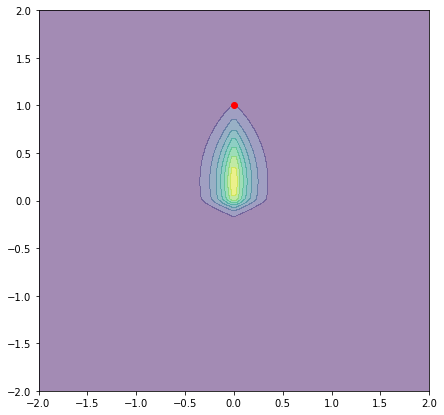

In [2]:
d = 2
u_true = np.array([[0],[1]])
std = 0.4
l1reg = 5
posterior = pds.L2Loss_SparsityReg(d=2, l2shift=u_true, l2scale=std, l1reg=l1reg)
X,Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
Z = np.concatenate((np.reshape(X,(1,-1)),np.reshape(Y,(1,-1))), axis=0)
unscaled_dens_vals = posterior.unscaled_pdf(Z)

plt.figure(figsize=(7,7))
unscaled_dens_plot = plt.contourf(X,Y,np.reshape(unscaled_dens_vals,(100,100)),alpha=0.5)
ground_truth = plt.scatter(u_true[0],u_true[1],color='r')

plt.show()

**Sample using PSGLA with constant step sizes and PSGLA with adjustable step sizes**

In [10]:
# what is the gradient Lipschitz constant L in this example? Is the quadratic a good option (since 1/L might be optimal)?
tau = 0.16
max_iter = np.round(np.max((100,10/tau))).astype(int)
n_samples = 100
x0 = np.zeros((2,n_samples))
psgla_fixed_step = PSGLA(max_iter, tau, x0, pd = posterior)
x_fixed_step, steps_fixed = psgla_fixed_step.simulate()

# psgla with backtracking
psgla_backtracking = PSGLA(max_iter, -2, x0, pd = posterior)
x_backtracking, steps_backtracking = psgla_backtracking.simulate()

**Compare samples after a fixed (small) number of steps. Is variable step size PSGLA faster?**

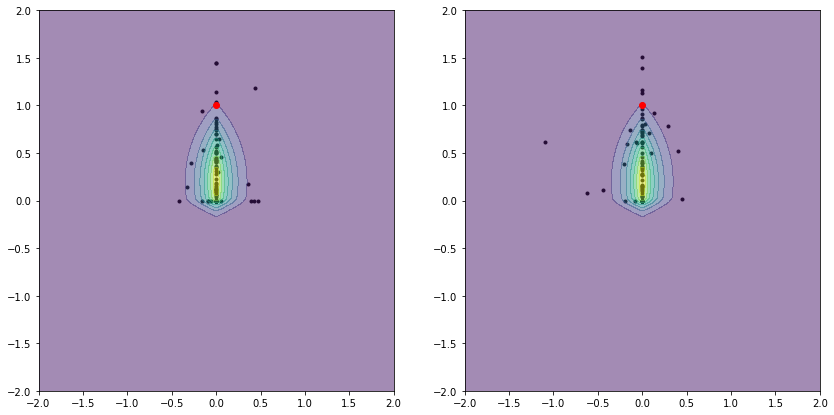

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
scatter_fixed_step = ax[0].scatter(x_fixed_step[0,:], x_fixed_step[1,:], c='k', marker='.')
scatter_backtracking = ax[1].scatter(x_backtracking[0,:], x_backtracking[1,:], c='k', marker='.')

unscaled_dens_plot = ax[0].contourf(X,Y,np.reshape(unscaled_dens_vals,(100,100)),alpha=0.5)
ground_truth = ax[0].scatter(u_true[0],u_true[1],color='r')
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-2,2)

unscaled_dens_plot = ax[1].contourf(X,Y,np.reshape(unscaled_dens_vals,(100,100)),alpha=0.5)
ground_truth = ax[1].scatter(u_true[0],u_true[1],color='r')
ax[1].set_xlim(-2,2)
ax[1].set_ylim(-2,2)

plt.show()

**Compare the sum of all steps made with both variants - the constant step size should evolve linearly, how does the variable one look like?**

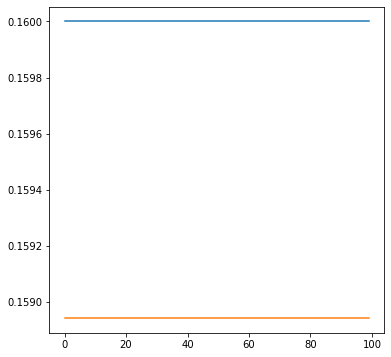

In [12]:
fig = plt.figure(figsize = (6,6))
plt.plot(np.arange(0,max_iter), steps_fixed)
plt.plot(np.arange(0,max_iter), steps_backtracking)